# COVID-19 Simulator

### Spread inference and further prediction.
© 2020 Giulio Corradini

In order to understand the spread of a disease, we use math models. The most common one is the SIR model, which stands for susceptible, infectious and recovered: categories of people during a pandemic.
Many models derive from the original SIR (e.g. SIRD where deceased people are another category) but the simplest one lets us figure out how is a virus spreading.

We're going to study the behaviour of COVID-19 in Italy. During this pandemic Protezione Civile and AGID upload disease data on their GitHub repository. Open data accessible to everyone!

The repository is located at: https://github.com/pcm-dpc/COVID-19

Let's begin by downloading the latest data from the repository; I've written a library that gets the job done using the *requests* module. It then converts it to JSON, extracts SIR data given a initial population value, converts everything to a numpy array.

In [1]:
import data_fetcher as df

# Download
latest = df.fetch_data()

sample_population = 500000

# Convert
italy_data = df.process_data(latest, sample_population)

Now that we have our data, we can infer the β and ɣ constants values that we need to further predict the spread of the disease.

I've written another module (sir.py) that contains facilities to infer these values given the values of SIR function in a discrete time domain.

Let's import the module and let it perform the computation for us. It uses bounded BFGS to evaluate the gradient descent of the function to compute beta and gamma.

In [2]:
from sir import *
interpolator = SIRInterpolation(italy_data)
beta, gamma = interpolator.fit()

In [3]:
print("β:", beta)
print("ɣ:", gamma)

β: 0.4434211991848095
ɣ: 0.3363787799225514


If these values don't change until the end of the pandemic, how may the virus possibly spread?

We istantiate a SIRPrediction object, we pass the population, beta, gamma, t (init time of simulation) and initial SIR values.

In [4]:
predictor = SIRPredict(sample_population, beta, gamma, t=len(italy_data), initsir=italy_data[-1])

# Predict for 100 days
predicted = predictor.spread_predict(100)

Let's gracefully plot our data using *matplotlib.pyplot* module.

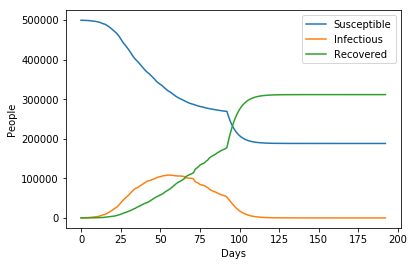

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Stack real data and predicted
plt.plot( np.vstack((italy_data, predicted)) )

plt.legend(("Susceptible", "Infectious", "Recovered"))
plt.xlabel("Days")
plt.ylabel("People")

plt.show()

The plot shows three angular points where real data becomes a prediction...

What is the value of R naught? A piece of cake!

$R_0 = \frac{\beta}{\gamma}$

In [12]:
rn = beta/gamma
print("R0: ", rn)

R0:  1.3182198927260032


This means that we need at least $\frac{R_0 - 1}{R_0}$ recovered people to achieve herd immunity.

In [16]:
# Herd immunity rate
hi = (rn - 1)/rn * 100

print("Herd immunity: {}%".format(hi))

Herd immunity: 24.140122181584033%
